In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import integrate

In [ ]:
N = 16
h = 1/(N+1)

nodes = np.linspace(0, 1, N+2)
nodes

array([0.        , 0.05882353, 0.11764706, 0.17647059, 0.23529412,
       0.29411765, 0.35294118, 0.41176471, 0.47058824, 0.52941176,
       0.58823529, 0.64705882, 0.70588235, 0.76470588, 0.82352941,
       0.88235294, 0.94117647, 1.        ])

In [ ]:
def phi(i, x):
    "Linear piecewise affine function finite element basis"
    try:
        if not isinstance(i, int):
            raise TypeError(f"Variable 'i' must be an integer, got {i}")
        if not (0 <= i <= N+1):
            raise ValueError(f"Variable 'i' must be an integer between 0 and N+1, got {i}")

        if i == 0:
            if nodes[0] <= x <= nodes[1]:
                return 1 - (x-nodes[i])/h
            else:
                return 0
        if i == N+1:
            if nodes[-2] <= x <= nodes[-1]:
                return 1 + (x-nodes[i])/h
            else:
                return 0
        if 0 < i < N+1:
            if nodes[i-1] <= x <= nodes[i]:
                return 1 + (x-nodes[i])/h
            elif nodes[i] < x <= nodes[i+1]:
                return 1 - (x-nodes[i])/h
            else:
                return 0

    except Exception as err:
        print(f"Error: {err}")

In [ ]:
def deriv_phi(i, x):
    "Linear piecewise affine function finite element basis"
    try:
        if not isinstance(i, int):
            raise TypeError(f"Variable 'i' must be an integer, got {i}")
        if not (0 <= i <= N+1):
            raise ValueError(f"Variable 'i' must be an integer between 0 and N+1, got {i}")

        if i == 0:
            if nodes[0] <= x <= nodes[1]:
                return -1/h
            else:
                return 0
        if i == N+1:
            if nodes[-2] <= x <= nodes[-1]:
                return 1/h
            else:
                return 0
        if 0 < i < N+1:
            if nodes[i-1] <= x <= nodes[i]:
                return 1/h
            elif nodes[i] < x <= nodes[i+1]:
                return -1/h
            else:
                return 0

    except Exception as err:
        print(f"Error: {err}")

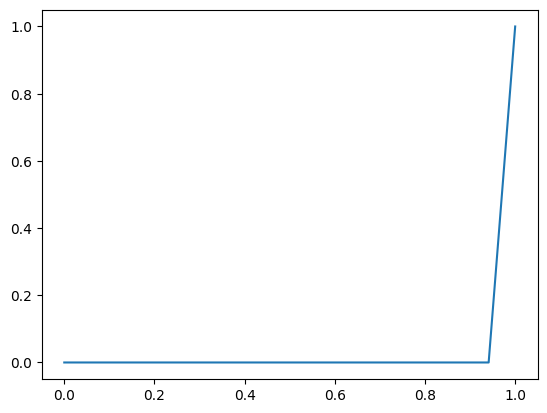

In [ ]:
plt.plot(nodes, [phi(N+1, x) for x in nodes])

In [ ]:
A = np.zeros((N+1, N+1))

def bilinear_form(u,v,du,dv):
    return u*v + du*dv

for i in range(1,N+2):
    integral_value = integrate.quad(lambda x: bilinear_form(phi(i,x),phi(i,x),deriv_phi(i,x),deriv_phi(i,x)), 0, 1)
    A[i-1,i-1] = integral_value[0]

for i in range(1,N+1):
    integral_value = integrate.quad(lambda x: bilinear_form(phi(i,x),phi(i+1,x),deriv_phi(i,x),deriv_phi(i+1,x)), 0, 1)
    A[i-1,i] = integral_value[0]

for i in range(1,N+1):
    integral_value = integrate.quad(lambda x: bilinear_form(phi(i+1,x),phi(i,x),deriv_phi(i+1,x),deriv_phi(i,x)), 0, 1)
    A[i,i-1] = integral_value[0]

A

array([[ 34.03921568, -16.99019608,   0.        ,   0.        ,
          0.        ,   0.        ,   0.        ,   0.        ,
          0.        ,   0.        ,   0.        ,   0.        ,
          0.        ,   0.        ,   0.        ,   0.        ,
          0.        ],
       [-16.99019608,  34.03921567, -16.99019609,   0.        ,
          0.        ,   0.        ,   0.        ,   0.        ,
          0.        ,   0.        ,   0.        ,   0.        ,
          0.        ,   0.        ,   0.        ,   0.        ,
          0.        ],
       [  0.        , -16.99019609,  34.03921573, -16.99019608,
          0.        ,   0.        ,   0.        ,   0.        ,
          0.        ,   0.        ,   0.        ,   0.        ,
          0.        ,   0.        ,   0.        ,   0.        ,
          0.        ],
       [  0.        ,   0.        , -16.99019608,  34.0392156 ,
        -16.99019608,   0.        ,   0.        ,   0.        ,
          0.        ,   0.        ,

In [ ]:
def linear_functional(v):
    return v

f = np.empty(N+1)

for i in range(1,N+2):
    integral_value = integrate.quad(lambda x: linear_functional(phi(i,x)), 0, 1)
    f[i-1] = integral_value[0]

f

array([0.05882353, 0.05882353, 0.05882353, 0.05882353, 0.05882353,
       0.05882353, 0.05882353, 0.05882353, 0.05882353, 0.05882353,
       0.05882353, 0.05882353, 0.05882353, 0.05882353, 0.05882353,
       0.05882353, 0.02941176])

In [ ]:
U = np.linalg.solve(A, f)
U

array([0.01022165, 0.01701649, 0.02040804, 0.02040804, 0.01701649,
       0.01022165, 0.00686501, 0.01029158, 0.01029158, 0.00686501,
       0.02122782, 0.03906694, 0.0535791 , 0.06481457, 0.07281223,
       0.07759978, 0.07919379])

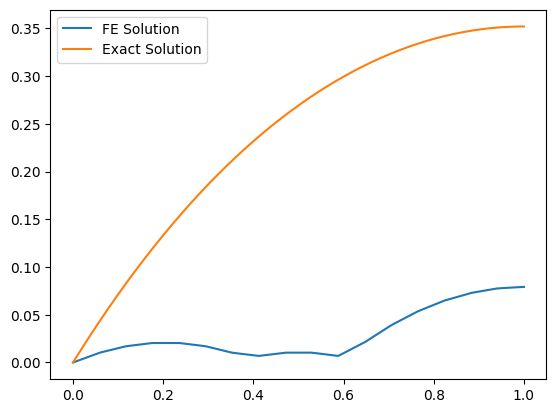

In [ ]:
def u_h(x):
    approx = 0
    for i in range(N+1):
        approx += U[i]*phi(i+1,x)
    return approx

def u(x):
    return 1 - (np.e**(2-x) + np.e**x)/(1 + np.e**2)

xes = np.linspace(0,1,200)
plt.plot(xes, [u_h(x) for x in xes], label = "FE Solution")
plt.plot(xes, [u(x) for x in xes], label = "Exact Solution")
plt.legend()